In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mplt
import seaborn as sn
%matplotlib inline
sn.set_style("darkgrid")

In [2]:
df12 = pd.read_csv("../data/01_district_wise_crimes_committed_ipc_2001_2012.csv")
df13 = pd.read_csv("../data/01_district_wise_crimes_committed_ipc_2013.csv")
df14 = pd.read_csv("../data/01_district_wise_crimes_committed_ipc_2014.csv")

In [3]:
df = pd.concat([df12, df13, df14])

In [4]:
df12.shape, df13.shape, df14.shape, df.shape

((9017, 33), (823, 33), (838, 91), (10678, 102))

Data for the year 2014 has many details which is not present in the previous data files

In [5]:
list(df14.columns)

['state_ut',
 'district',
 'year',
 'murder',
 'attempt_to_commit_murder',
 'culpable_homicide_not_amounting_to_murder',
 'attempt_to_commit_culpable_homicide',
 'rape',
 'custodial_rape',
 'custodial_gang_rape',
 'custodial_other_rape',
 'rape_other_than_custodial',
 'rape_gang_rape',
 'rape_others',
 'attempt_to_commit_rape',
 'kidnapping_abduction_total',
 'kidnapping_abduction',
 'kidnapping_abduction_in_order_to_murder',
 'kidnapping_for_ransom',
 'kidnapping_abduction_of_women_to_compel_her_for_marriage',
 'other_kidnapping',
 'dacoity',
 'dacoity_with_murder',
 'other_dacoity',
 'making_preparation_and_assembly_for_committing_dacoity',
 'robbery',
 'criminal_trespass_burglary',
 'criminal_trespass_or_burglary',
 'house_trespass_house_breaking',
 'theft',
 'auto_theft',
 'other_thefts',
 'unlawful_assembly',
 'riots',
 'riots_communal',
 'riots_industrial',
 'riots_political',
 'riots_caste_conflict',
 'riots_sc_sts_vs_non_scs_sts',
 'riots_other_caste_conflict',
 'riots_agrarian

As said earlier, some columns may seem similar that they can be merged by preprocessing. But the data file for 2014 has columns which is a aggregate of two or more other columns. For example, 'counterfeit' column is an aggregate value of other columns related to counterfeiting added.

We will now group them all by year and look at the trend

In [6]:
totals = df.loc[df.district != 'Total', :]
yr_totals = totals.groupby('year')
yr_agg = yr_totals.sum().reset_index()

Since most columns are only present in the 2014 data file, we will encounter NAs in all but one row for every column now. So, we drop those columns. Also, we will perform imputation.

In [7]:
for cl in yr_agg.columns:
    if cl == 'year':
        continue
    if yr_agg[cl].isnull().sum() > 10:
        yr_agg = yr_agg.drop(cl, axis=1)
    else:
        mean_cl = np.mean(yr_agg[cl])
        yr_agg[cl] = yr_agg[cl].fillna(mean_cl)
        yr_agg[cl] = yr_agg[cl].apply(lambda x: x/10000)

In [8]:
yr_agg.describe()

,year,arson,assault_on_women_with_intent_to_outrage_her_modesty,attempt_to_murder,auto_theft,burglary,causing_death_by_negligence,cheating,counterfeiting,criminal_breach_of_trust,...,murder,other_ipc_crimes,other_rape,other_theft,preparation_and_assembly_for_dacoity,rape,riots,robbery,theft,total_ipc_crimes
count,14.0000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,2007.5000,1.016293,4.889843,3.292985,13.677157,10.382277,9.723129,7.986586,0.242250,1.772064,...,3.637743,94.068864,2.407285,21.142715,0.303846,2.511807,7.045579,2.547657,35.141314,229.763631
std,4.1833,0.271635,2.935312,1.117629,6.850650,3.046539,4.206353,4.329623,0.079537,0.646573,...,0.872108,36.995910,1.283548,5.869298,0.107772,1.341566,2.215729,1.227135,12.377830,89.110589
min,2001.0000,0.849800,3.342800,2.634900,7.160700,9.168100,5.761400,4.691000,0.156800,1.386300,...,3.281300,72.045700,1.633600,18.402900,0.168800,1.633700,5.629600,1.795300,26.078100,176.352400
25%,2004.2500,0.869875,3.499475,2.843125,9.080900,9.366275,7.047500,5.469650,0.200875,1.450850,...,3.318075,76.387450,1.883900,19.110300,0.251775,1.884225,6.001100,1.906425,29.126250,188.040850
50%,2007.5000,0.919800,3.943250,2.956950,12.009050,9.448600,8.997700,6.786700,0.229800,1.632050,...,3.399450,86.445950,2.159900,19.472300,0.295550,2.160050,6.614750,2.079400,31.885400,209.423350
75%,2010.7500,1.029425,4.302225,3.196750,16.501125,9.803275,10.819225,8.789550,0.257125,1.758325,...,3.492825,94.261050,2.372288,20.198100,0.327475,2.425325,6.895050,2.494450,35.792925,229.225798
max,2014.0000,1.871400,14.147800,7.083400,33.138000,20.880200,22.303400,21.466000,0.469800,3.925400,...,6.640200,218.525000,6.741200,41.386400,0.631800,6.741400,14.425200,6.385400,74.524400,529.544400


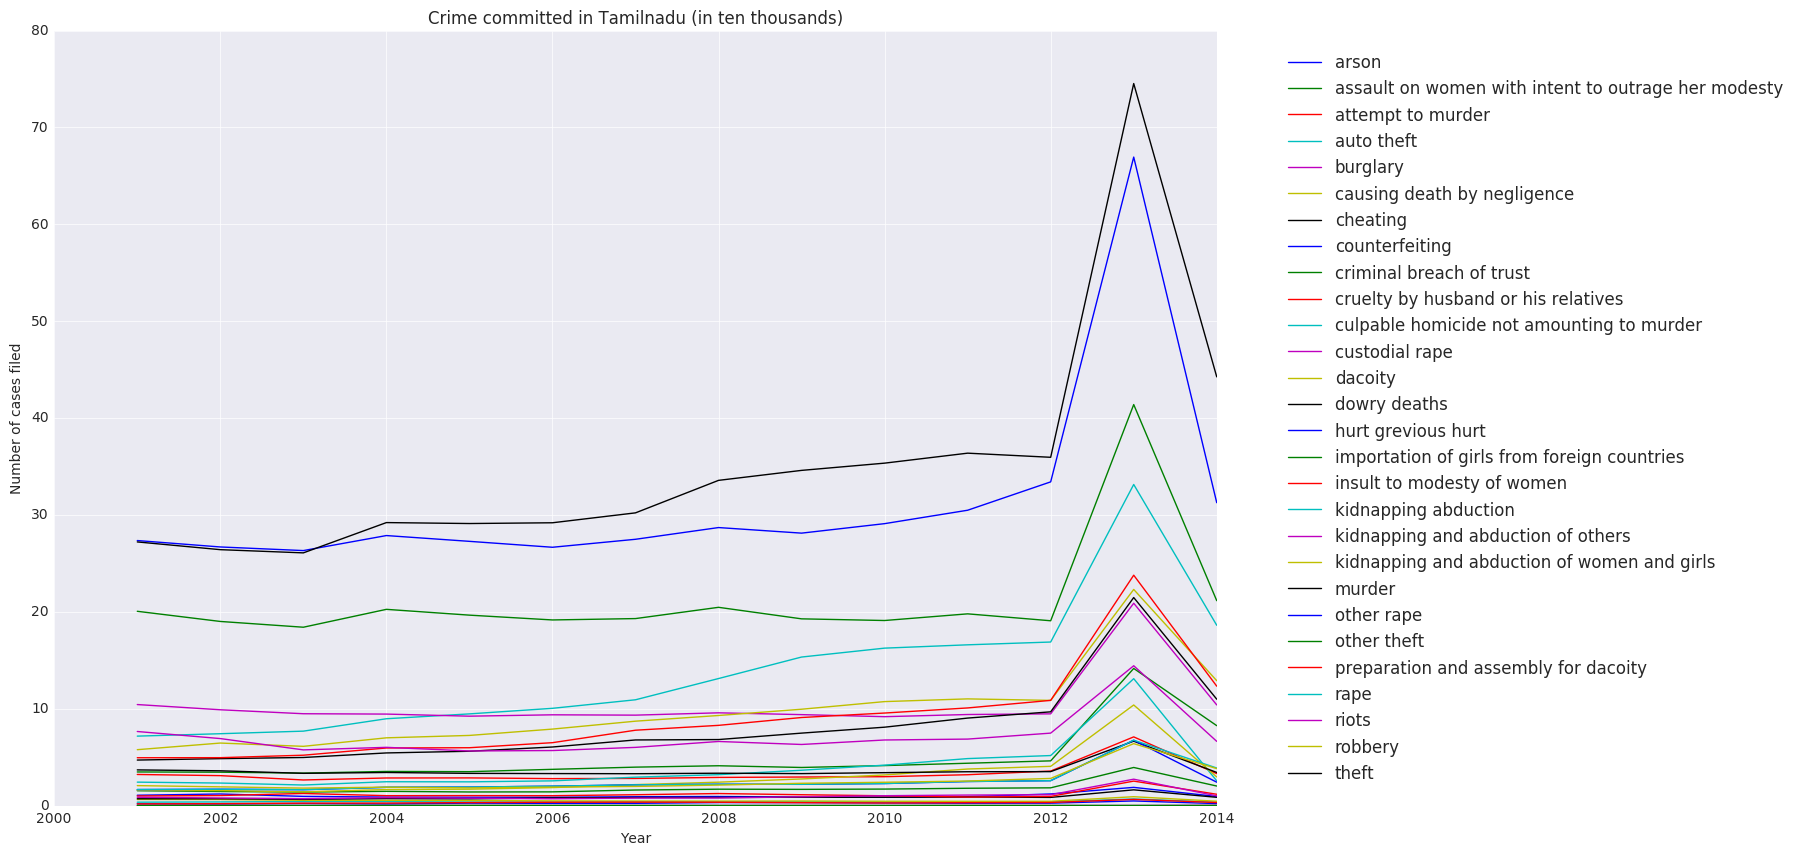

In [9]:
cols = list(yr_agg.columns)
cols.remove('year')
cols.remove('total_ipc_crimes')
cols.remove('other_ipc_crimes')
fig = mplt.figure()
fig.set_size_inches(15, 10)
ax = mplt.subplot(111)
# ax.set_xlim([2001, 2014])
ax.set_title("Crime committed in Tamilnadu (in ten thousands)")
ax.set_xlabel("Year")
ax.set_ylabel("Number of cases filed")
for col in cols:
    ax.plot(yr_agg.year, yr_agg[col], label=col.replace('_', ' '))
ax.legend(loc=5, bbox_to_anchor=(1.5, .5))

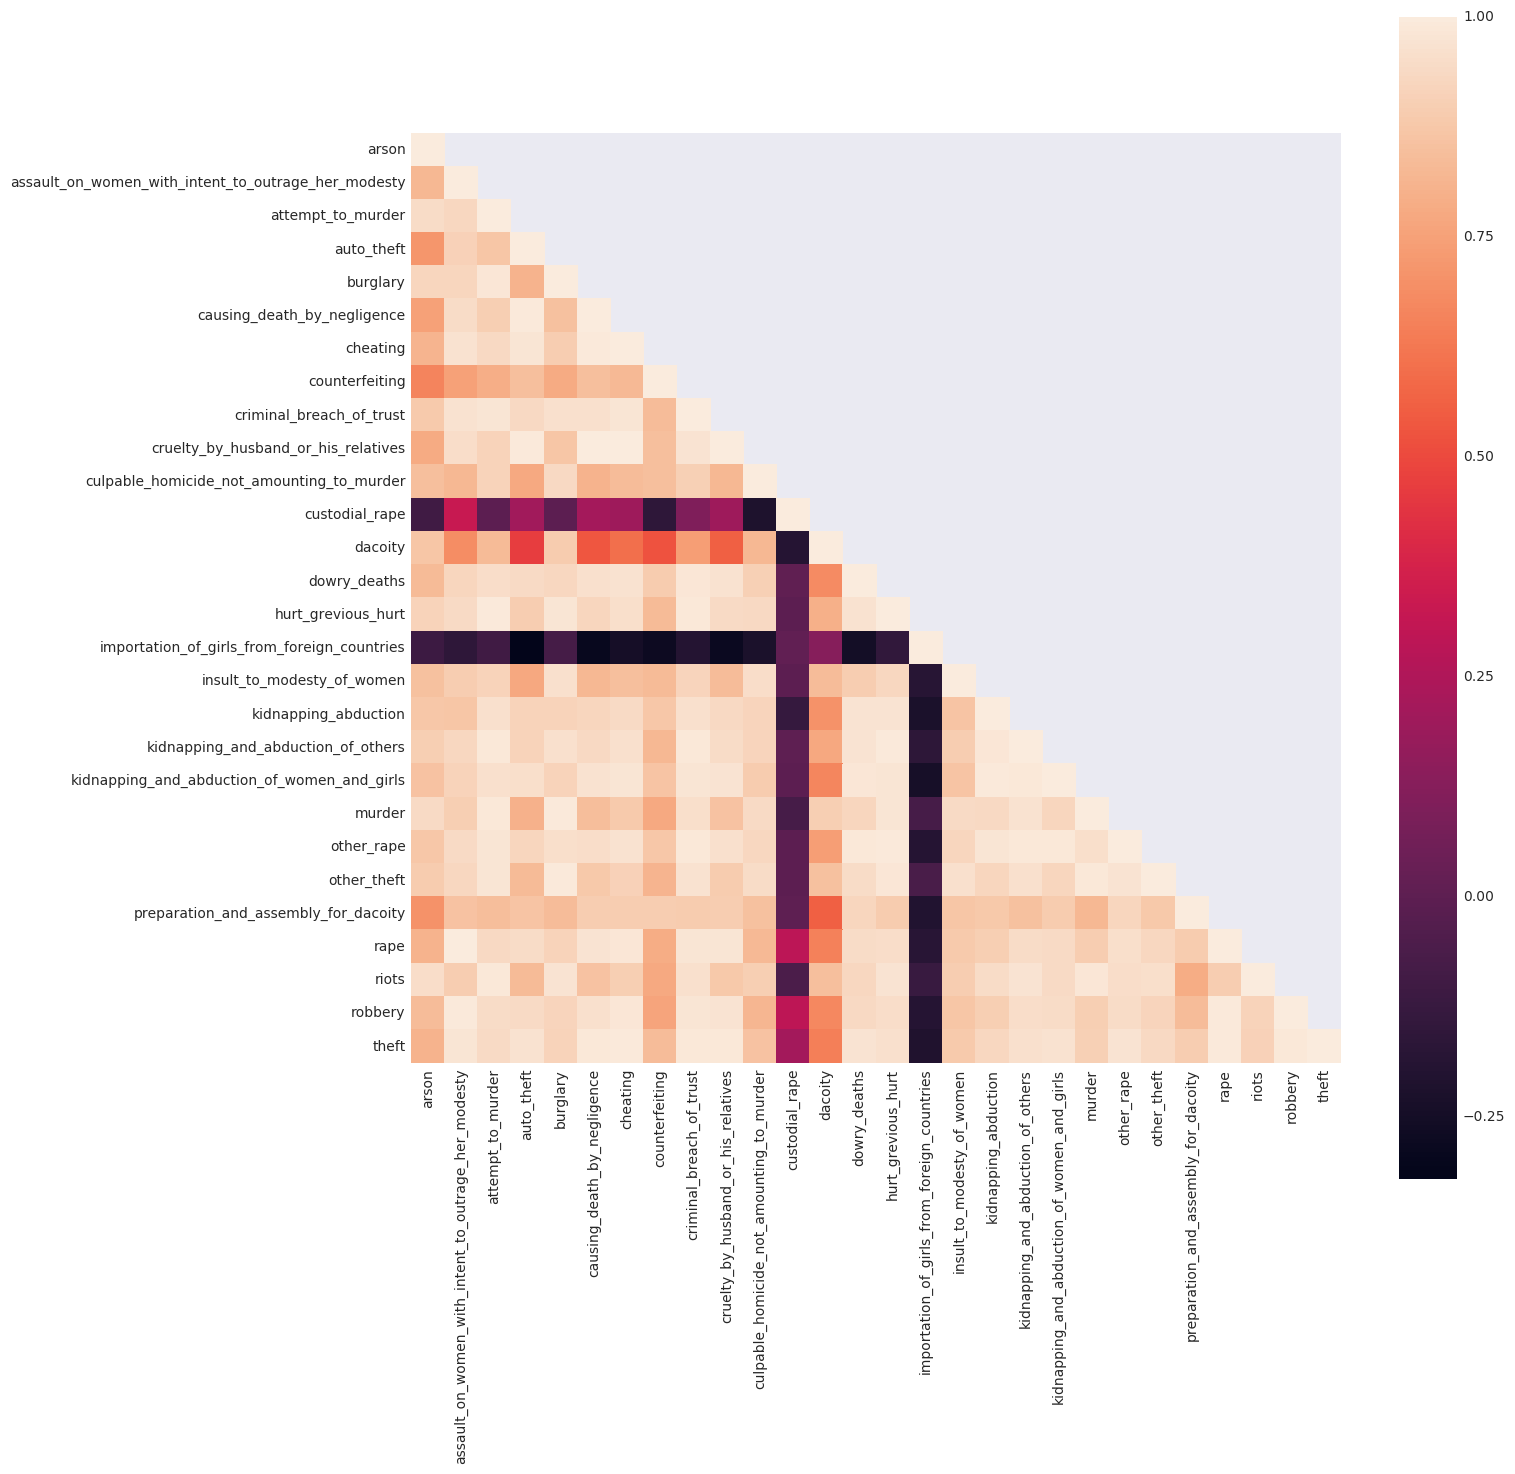

In [10]:
corr = yr_agg[cols].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig, ax = mplt.subplots()
fig.set_size_inches(15, 15)
sn.heatmap(corr, mask=mask, ax=ax, square=True)

In [11]:
yr_agg.max().reset_index().sort_values(by=0, ascending=False)

,index,0
0,year,2014.0000
30,total_ipc_crimes,529.5444
22,other_ipc_crimes,218.5250
29,theft,74.5244
15,hurt_grevious_hurt,66.9338
24,other_theft,41.3864
4,auto_theft,33.1380
10,cruelty_by_husband_or_his_relatives,23.7732
6,causing_death_by_negligence,22.3034
7,cheating,21.4660
